# Titanic Competition
## RafaCastle

In this first try I'm going to make the model as simple as I can, I'm going to use a linear regression in order to predict if a passenger survived or not.

### Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

Import the dataset

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

![Title](1.png)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# the name is not important
df_train =  df_train.drop('Name', axis=1)
df_test =  df_test.drop('Name', axis=1)
# variables to integer
le = LabelEncoder()
df_train.Sex = le.fit_transform(df_train.Sex)
model_mapping = {index : label for index, label in enumerate(le.classes_)}
#transform ticket 
df_train.Ticket = le.fit_transform(df_train.Ticket)
df_train.Embarked = le.fit_transform(df_train.Embarked)
model_mapping = {index : label for index, label in enumerate(le.classes_)}
#transform cabin
df_train.Cabin = le.fit_transform(df_train.Cabin)
model_mapping = {index : label for index, label in enumerate(le.classes_)}

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,1,35.0,0,0,472,8.0500,147,2


In [7]:
# Doing the same to the test sample: 
df_test.Sex = le.fit_transform(df_test.Sex)
df_test.Embarked = le.fit_transform(df_test.Embarked)
df_test.Ticket = le.fit_transform(df_test.Ticket)
df_test.Cabin = le.fit_transform(df_test.Cabin)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,152,7.8292,76,1
1,893,3,0,47.0,1,0,221,7.0000,76,2
2,894,2,1,62.0,0,0,73,9.6875,76,1
3,895,3,1,27.0,0,0,147,8.6625,76,2
4,896,3,0,22.0,1,1,138,12.2875,76,2


## EDA

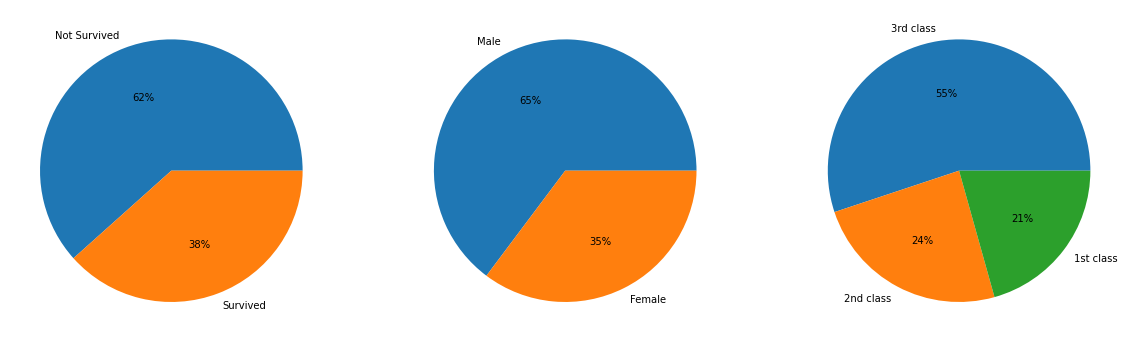

In [8]:
# counting cancellations
pplot1=df_train['Survived'].value_counts()
pplot2=df_train['Sex'].value_counts()
pplot3=df_train['Pclass'].value_counts()

#labels
labels1=["Not Survived","Survived"]
labels2=["Male","Female"]
labels3=["3rd class","2nd class","1st class"]

#plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.pie(pplot1, autopct='%.0f%%',labels=labels1);
ax2.pie(pplot2, autopct='%.0f%%',labels=labels2);
ax3.pie(pplot3, autopct='%.0f%%',labels=labels3);
plt.show()

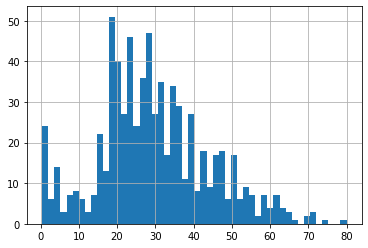

In [9]:
# Age histogram
df_train["Age"].hist(bins=50,)
plt.show()

In [10]:
df_train["Age"].mean()

29.69911764705882

Correlation matrix

<AxesSubplot:>

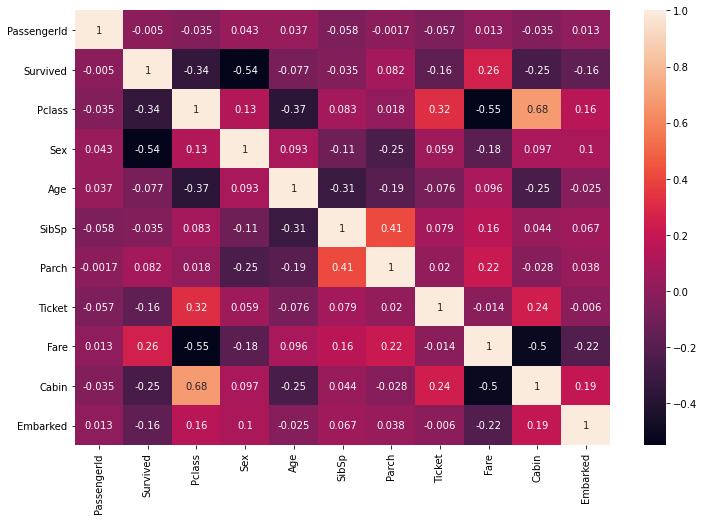

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(),annot = True)

In [12]:
df_train.corr()[["Survived"]]

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Sex,-0.543351
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Ticket,-0.164549
Fare,0.257307
Cabin,-0.254888


### Data cleaning

Filling the na values

In [13]:
Train = df_train[['PassengerId','Survived','Pclass','Age','Sex','Ticket','Fare','Cabin','Embarked','SibSp']]
Test = df_test[['PassengerId','Pclass','Age','Sex','Ticket','Fare','Cabin','Embarked','SibSp']]

In [14]:
Train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
Sex              0
Ticket           0
Fare             0
Cabin            0
Embarked         0
SibSp            0
dtype: int64

In [15]:
Test.isna().sum()

PassengerId     0
Pclass          0
Age            86
Sex             0
Ticket          0
Fare            1
Cabin           0
Embarked        0
SibSp           0
dtype: int64

In [16]:
# Filling the missing values with the mean
mean_age_train = Train['Age'].mean()
mean_age_test = Test['Age'].mean()

Train.fillna(mean_age_train,inplace=True)
Test.fillna(mean_age_test,inplace=True)

### Logistic regression

In [17]:
X_train = Train.drop('Survived',axis=1)
y_train = Train[['Survived']]

In [18]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = clf.predict(Test)
sub = {'PassengerId': df_test.PassengerId,'Survived': y_pred }
sub = pd.DataFrame(data=sub)
sub.to_csv('submission.csv', index = False)

### Kaggle score: 0.75358